In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from scipy import stats
import plotly.express as px
import os

### Brazilian Amazon Rainforest Degradation Analysis (1999-2019):
Let's analyze the degradation data of the Brazilian Amazon Rainforest. We want to find out what factors could be causing deforestation from the data that is provided. First off, let's look at the deforested area per state over the years. 

FileNotFoundError: [Errno 2] No such file or directory: 'inpe_brazilian_amazon_fires_1999_2019.csv'

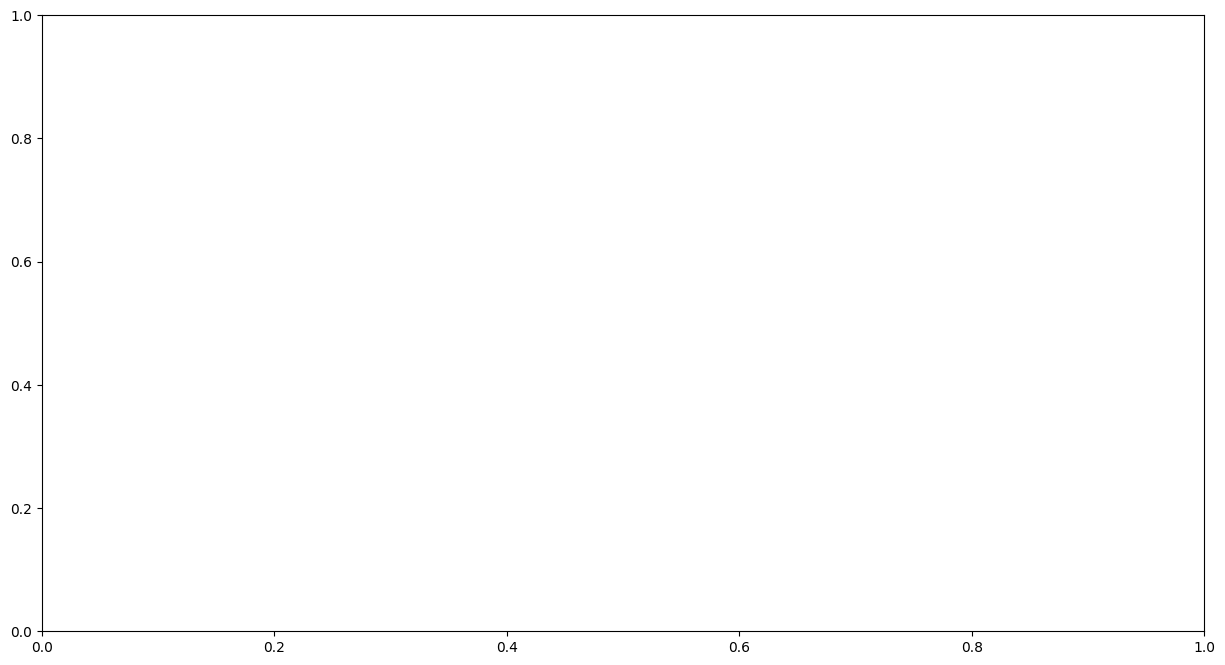

In [23]:
fig, ax = plt.subplots(figsize=(15,8))
deforest_df = pd.read_csv('inpe_brazilian_amazon_fires_1999_2019.csv')
deforest_df.drop(['AMZ LEGAL'], axis=1, inplace=True)
states = ['Acre', 'Amazonas', 'Amapa', 'Maranhao', 'Mato Grosso', 'Para', 'Rondonia', 'Roraima', 'Tocantins']
deforest_df.plot(x='Ano/Estados', y=deforest_df.columns[1:10], 
                 label=states , colormap='tab10', linewidth=2, ax=ax)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Area in $km^2$', fontsize=12)
ax.set_title('Yearly Deforested Amazon Rainforest Area by State from 2004-2019', fontsize=14)
ax.grid(axis='y', color='0.95')

2004 was an especially bad year for deforestation, and while the area that was deforested was on a downward trend until 2012, it rose again after that for most of the states. Plotting the area for each state on a separate graph could give us a clearer picture. 

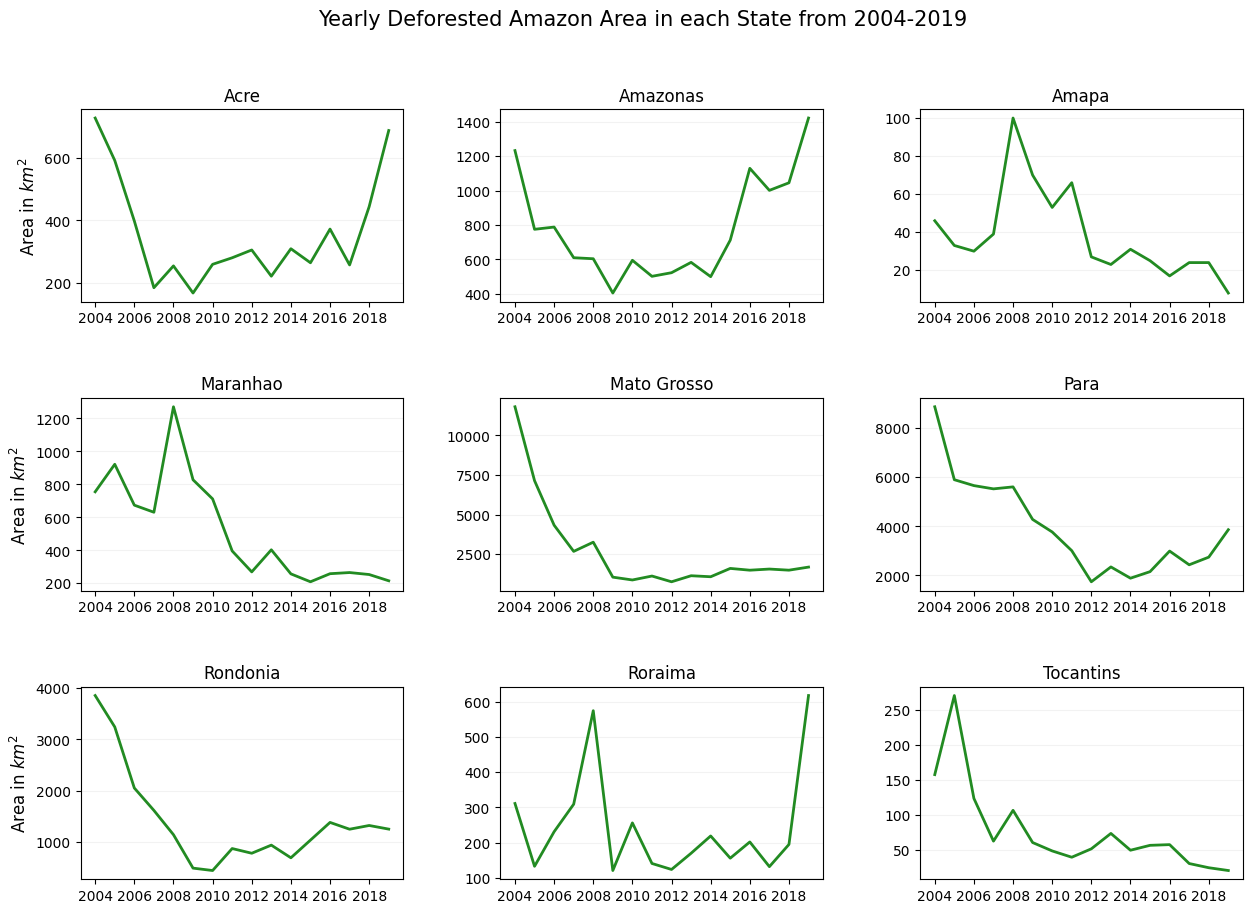

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.suptitle('Yearly Deforested Amazon Area in each State from 2004-2019', fontsize=15)
col_names = deforest_df.columns[1:10]
for i in range(3):
    for j in range(3):
        col = col_names[i*3+j]
        ax[i,j].plot(deforest_df['Ano/Estados'], deforest_df[col], linewidth=2, color='forestgreen')
        ax[i,j].set_ylabel('Area in $km^2$', fontsize=12)
        ax[i,j].set_title(states[i*3+j])
        ax[i,j].grid(axis='y', color='0.95')
        ax[i,j].xaxis.set_major_locator(MaxNLocator(integer=True))
        if (j>0):
             ax[i,j].set(ylabel='')

When plotted individually, we can see that not all states had a downward trend in deforestation from 2004 to 2012. Amapa, Maranhao and Roraima saw increases in deforestation during that time period. Now, let's look at the trend in total deforested area from 2004 to 2019.  

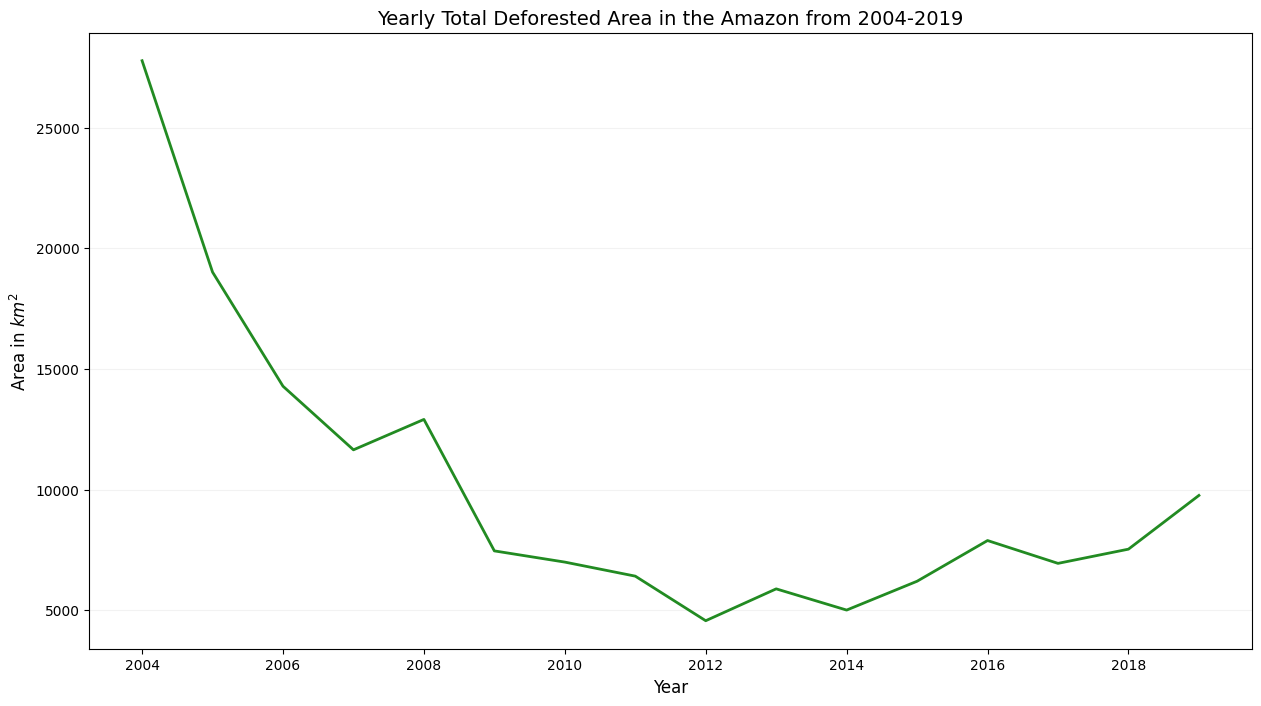

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
deforest_df['total_area'] = deforest_df['AC'] + deforest_df['AM'] + deforest_df['AP'] + deforest_df['MA'] + deforest_df['MT'] + deforest_df['PA'] + deforest_df['RO'] + deforest_df['RR']+ deforest_df['TO']
deforest_df.plot(x='Ano/Estados', y='total_area',linewidth=2, 
                 legend=False, color='forestgreen', ax=ax)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Area in $km^2$', fontsize=12)
ax.set_title('Yearly Total Deforested Area in the Amazon from 2004-2019', fontsize=14)
ax.grid(axis='y', color='0.95')

When adding up all the deforested areas in the 9 states, we can see that deforestation slowed and increased over the years. 2004-2012 saw an overall downward trend in forest loss, but there has been a consistent increase since then. Can we figure out which state has had the most deforestation since 2004?

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
states_def_df = deforest_df.append(deforest_df.sum(numeric_only=True), ignore_index=True)
states_def_df.drop(['Ano/Estados', 'total_area'], axis=1, inplace=True)
bar_def = states_def_df.iloc[[-1]].squeeze().tolist()
ax.bar(states, bar_def, width=0.6, color='darkolivegreen')
ax.set_ylabel('Area in $km^2$', fontsize=12)
ax.set_title('Total Deforested Area in each State from 2004-2019', fontsize=14)
plt.show()

KeyError: "['Ano/Estados'] not found in axis"

Para has had the most deforestation from 2004-2019. Later, we will find out if Para has had a large number of fires that could have contributed to loss in tree cover. 

#### El Nino and La Nina: 
Now, let's look at whether the global climate phenomena of El Nino and La Nina have any relation to the deforestation rate in the Brazilian Amazon rainforest. 

El Nino brings dry conditions to South America, leading to more chances of forest fires in the Amazon. Also, fires set by people have more chances to burn out of control. La Nina on the other hand, brings wet conditions to the Amazon, which will reduce the impact of forest fires. Below is a chart showing the years and severity of the two phenomena.

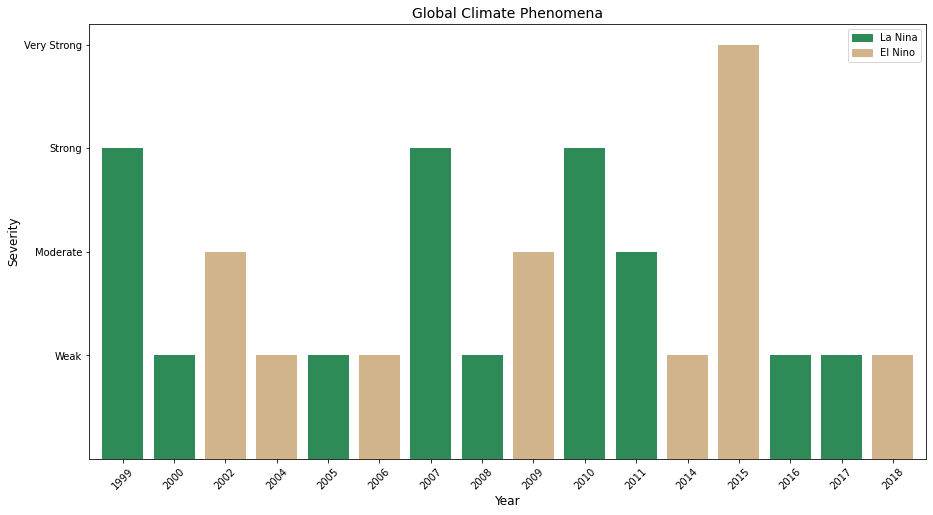

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
climate_df = pd.read_csv('../input/brazilian-amazon-rainforest-degradation/el_nino_la_nina_1999_2019.csv')
height_map = {'Weak': 1, 'Moderate': 2, 'Strong': 3, 'Very Strong': 4}
climate_df['severity_height'] = climate_df['severity'].map(height_map)
climate_df.sort_values(by='start year', inplace=True)
colors = {'La Nina': 'seagreen', 'El Nino': 'tan'}
climate_df.plot.bar(x='start year', y='severity_height', 
                    yticks=range(1,5,1), width = 0.8,  
                    color=climate_df['phenomenon'].replace(colors), rot=45, ax=ax)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Severity', fontsize=12)
ax.set_title('Global Climate Phenomena', fontsize=14)
ax.set_yticklabels(height_map.keys())
labels = ['La Nina', 'El Nino']
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax.legend(handles, labels)
plt.show()

Let's overlay the deforestation trend line with the severity of El Nino and La Nina, and see if we can notice any correlations.

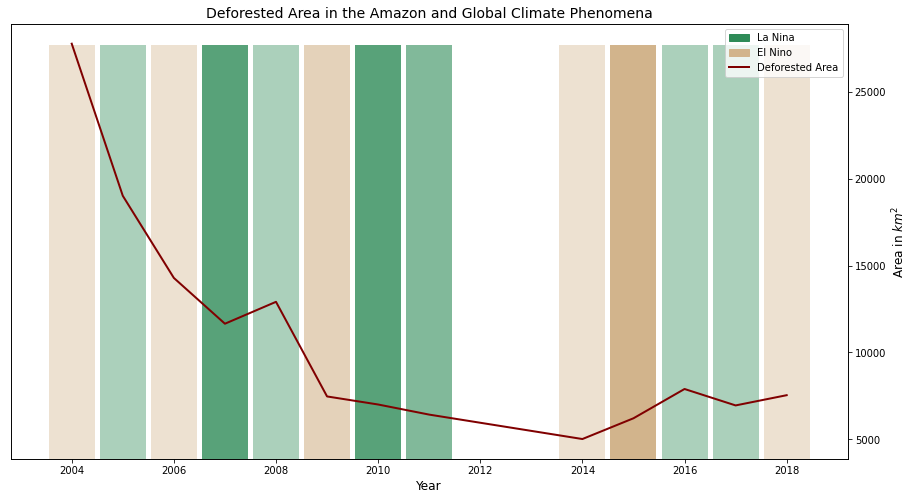

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
deforest_climate_df = pd.merge(left=climate_df, right=deforest_df, left_on='start year', right_on='Ano/Estados')
alpha_map = {'Weak': 0.4, 'Moderate': 0.6, 'Strong': 0.8, 'Very Strong': 1}
deforest_climate_df['severity_alpha'] = deforest_climate_df['severity'].map(alpha_map)
# Plot El Nino and La Nina bars
ax.bar(x=deforest_climate_df['start year'], height=1, width=0.9, color=deforest_climate_df['phenomenon'].replace(colors))
for bar, alpha in zip(ax.containers[0], deforest_climate_df['severity_alpha']):
    bar.set_alpha(alpha)
ax.get_yaxis().set_ticks([])
# Plot deforestation line 
ax2 = ax.twinx()
deforest_climate_df.plot(x='Ano/Estados', y='total_area', 
                 linewidth=2, 
                 legend=False, color='maroon', ax=ax2)
ax.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Area in $km^2$', fontsize=12)
ax.set_title('Deforested Area in the Amazon and Global Climate Phenomena', fontsize=14)
# Make a legend
legend_labels = ['La Nina', 'El Nino', 'Deforested Area']
handles = [plt.Rectangle((0,0),1,1,color=colors[label]) for label in labels]
line = plt.Line2D([0], [0], color='maroon', linewidth=2, label='Deforested Area')
handles.append(line)
ax.legend(handles, legend_labels)
plt.show()

Looking at the severities of El Nino and La Nina (indicated by the transparency of the bars), as well as the rate of deforestation, there doesn't appear to be a correlation between the two factors. Deforestation doesn't necessarily increase or decrease after a La Nina or El Nino event. 

#### Amazon Fire Outbreaks Data Analysis: 
Next, let's analyze the firespots data for the Amazon states. A map is always helpful to relate to where the data comes from geographically. Below is a map of the fires in each state from 1999-2019. Each dot represents multiple fires at the average latitude and longitude of those fires. 

In [ ]:
months_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep',
             10:'Oct', 11:'Nov', 12:'Dec'}
fires_df = pd.read_csv('../input/brazilian-amazon-rainforest-degradation/inpe_brazilian_amazon_fires_1999_2019.csv')
fires_df.state = [x.capitalize() for x in fires_df.state]
fires_df['month_str'] = fires_df['month'].map(months_map)
fig = px.scatter_geo(fires_df, lat='latitude',lon='longitude', color='state', 
                     hover_data=['state', 'year', 'month_str', 'firespots'], width=800, height=500)
fig.update_layout(title = 'Amazon Fire Outbreaks Map from 1999-2019', title_x=0.5, geo_scope='south america',
                 legend_title_text='State')
fig.show()

Let's examine the fire frequency for all the states. A heatmap would be able to tell us which states have more frequent fires.

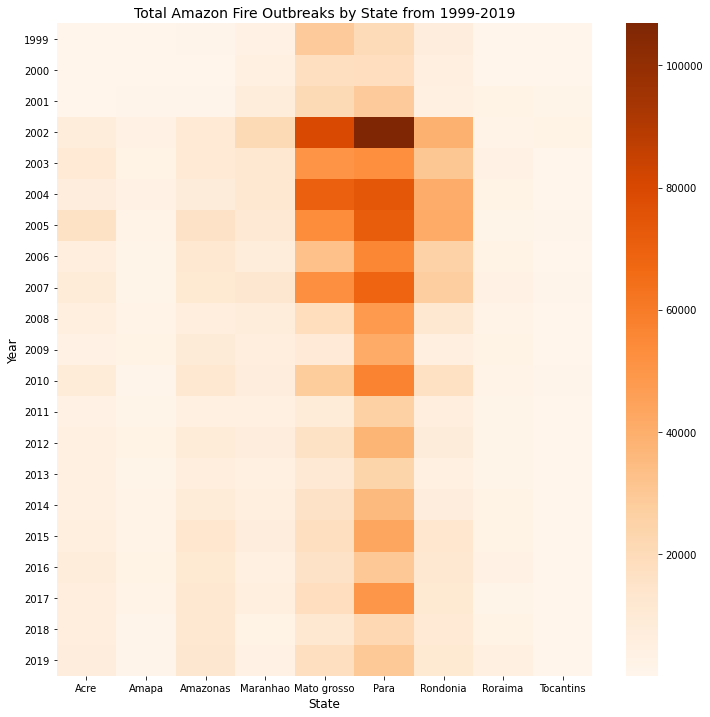

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
fires_piv = pd.pivot_table(fires_df, values='firespots',index=['year'], columns=['state'], 
                     aggfunc=np.sum, fill_value=0)
ax = sns.heatmap(fires_piv, cmap='Oranges')
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Year', fontsize=12)
ax.set_title('Total Amazon Fire Outbreaks by State from 1999-2019', fontsize=14)
plt.setp(ax.yaxis.get_majorticklabels(), rotation=0)
plt.show()

Mato Grosso, Para, and Rondonia have a higher number of fires compared to the other states. Para had an exceptionally high number of fires in 2002. Earlier, we had found that Para also has the highest deforested area out of the nine states. Let's look at each state individually and see if we can spot any trends in the data. 

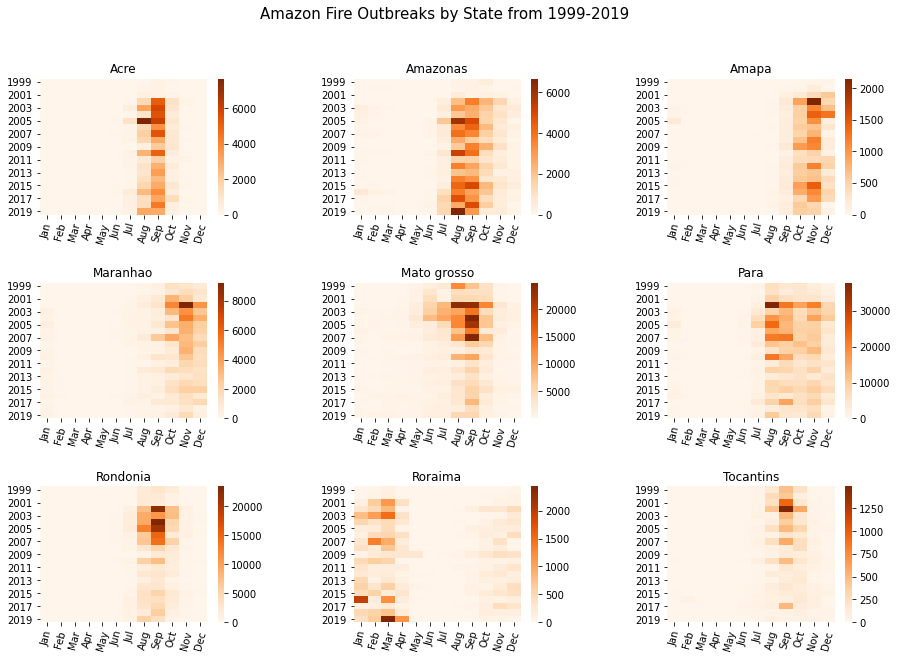

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(15,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('Amazon Fire Outbreaks by State from 1999-2019', fontsize=15)
# Make a pivot table for fires in each state
states_piv = pd.pivot_table(fires_df, values='firespots',index=['year'], columns=['state', 'month'], 
                            aggfunc=np.sum, fill_value=0)
states_list = ['Acre', 'Amazonas', 'Amapa', 'Maranhao', 'Mato grosso', 'Para', 'Rondonia', 'Roraima', 'Tocantins']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i in range(3):
    for j in range(3):
        col = states_list[i*3+j]
        piv_plot = states_piv[[col]]
        sns.heatmap(piv_plot, cmap='Oranges', xticklabels=months, ax=ax[i,j])
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylabel('')
        ax[i,j].set_title(col)
        plt.setp(ax[i,j].xaxis.get_majorticklabels(), rotation=75)

By separating the heatmaps for each state, we can see that different states show higher numbers of fires at different times of the year. Most of the states see more fires in the second half of the year, while Roraima saw more fires in the first half of the year. 

We can examine the firespots data from all states to see how the month affects the number of fires.

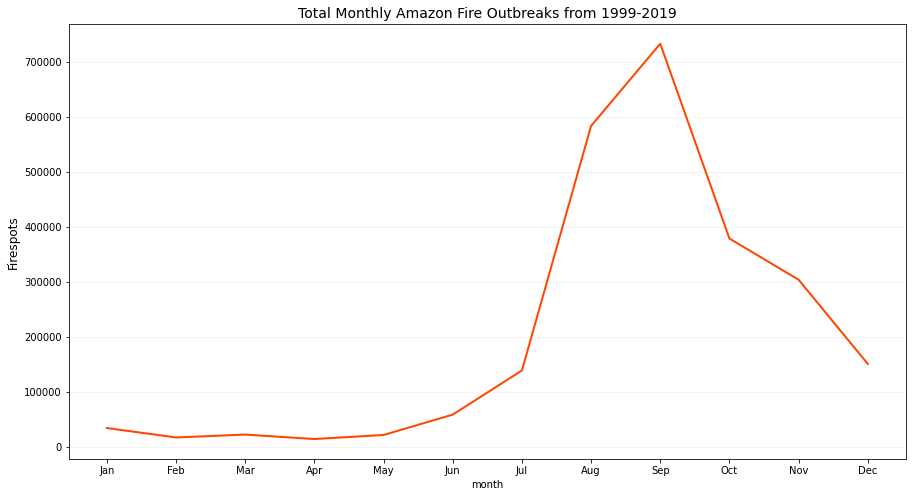

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
months_piv = pd.pivot_table(fires_df, values='firespots',index=['month'], aggfunc=np.sum, fill_value=0)
months_piv.plot(xticks=range(1,13,1), linewidth=2, color='orangered', legend=False, ax=ax)
ax.set_ylabel('Firespots', fontsize=12)
ax.set_title('Total Monthly Amazon Fire Outbreaks from 1999-2019', fontsize=14)
ax.set_xticklabels(months_map.values())
ax.grid(axis='y', color='0.95')
plt.show()

We can see that overwhelmingly larger numbers of fire outbreaks occurred in the second half of the years from 1999-2019. 

Next, let's plot trend lines for the fires in each state to see how fire frequency has changed over the years. 

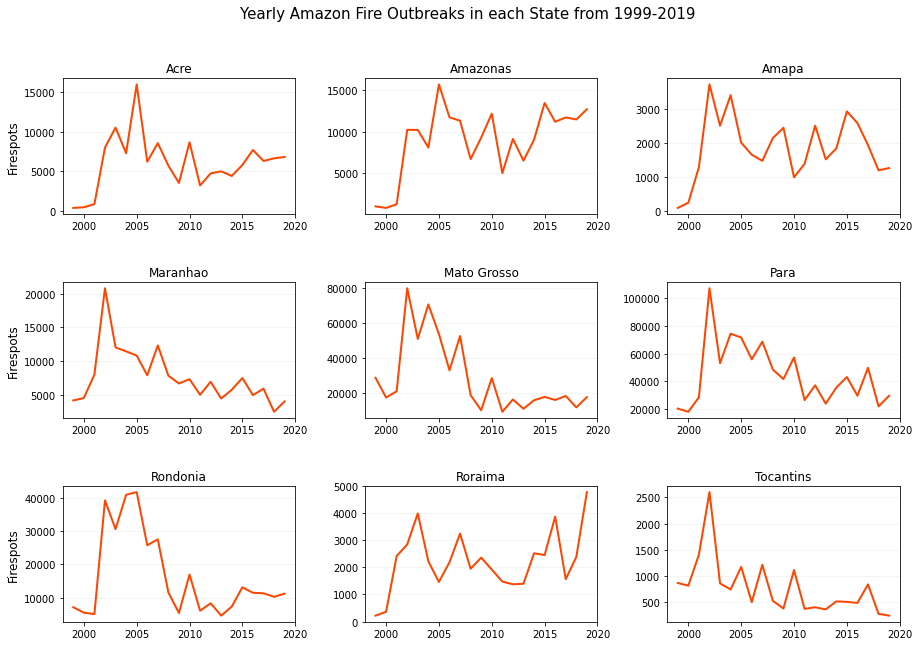

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.suptitle('Yearly Amazon Fire Outbreaks in each State from 1999-2019', fontsize=15)
for i in range(3):
    for j in range(3):
        col = states_list[i*3+j]
        piv_plot = fires_piv[[col]]
        ax[i,j].plot(piv_plot.index, piv_plot[col], linewidth=2, color='orangered')
        ax[i,j].set_ylabel('Firespots', fontsize=12)
        ax[i,j].set_title(states[i*3+j])
        ax[i,j].grid(axis='y', color='0.95')
        if (j>0):
             ax[i,j].set(ylabel='')

From the graphs above we can see that the states don't follow the same trends in number of fires from 1999-2019. Some states saw more fires from 1999-2009, others saw fewer fires in the same time period. 

Next, let's plot the trend in fires in all nine states from 1999 to 2019.  

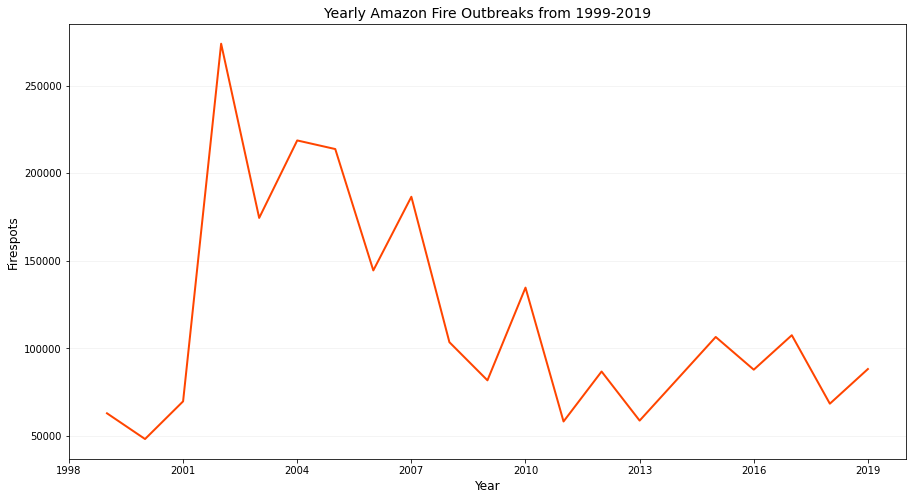

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
total_fires_piv = pd.pivot_table(fires_df, values='firespots',index=['year'], 
                     aggfunc=np.sum, fill_value=0)
total_fires_piv.plot(linewidth=2, color='orangered', legend=False, ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Firespots', fontsize=12)
ax.set_title('Yearly Amazon Fire Outbreaks from 1999-2019', fontsize=14)
ax.grid(axis='y', color='0.95')
plt.show()

Looking at the graph above, we can see that the number of fires was very high between 2001 and 2004, and reduced after that but with recurring highs. 

There may be a relationship between the number of fires and the loss of tree cover. Let's plot the total firespots and total deforested area over time to examine this possibility. 

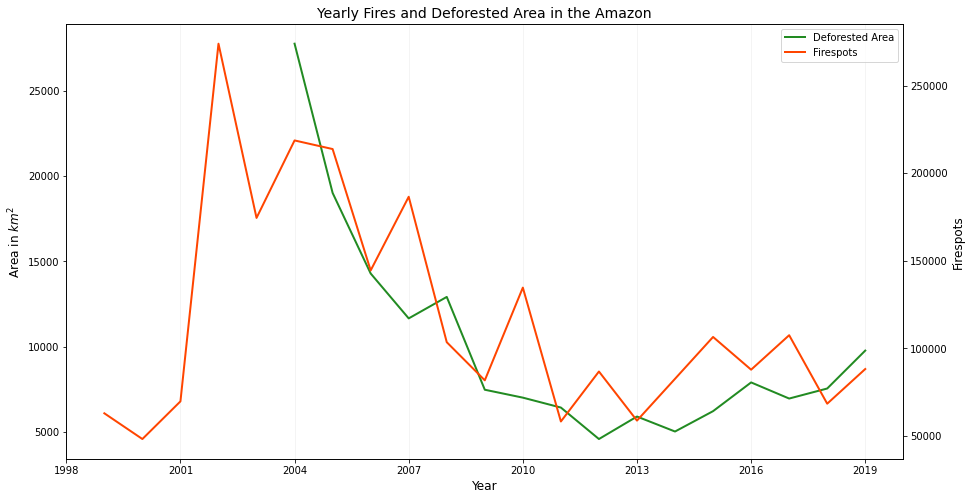

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Yearly Fires and Deforested Area in the Amazon', fontsize=14)
# Plot the total deforested area
deforest_df['total_area'] = deforest_df['AC'] + deforest_df['AM'] + deforest_df['AP'] + deforest_df['MA'] + deforest_df['MT'] + deforest_df['PA'] + deforest_df['RO'] + deforest_df['RR']+ deforest_df['TO']
deforest_df.plot(x='Ano/Estados', y='total_area', 
                 linewidth=2, legend=False, color='forestgreen', ax=ax)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Area in $km^2$', fontsize=12)
ax.grid(axis='x', color='0.95')
# Plot the total number of firespots
ax2 = ax.twinx()
total_fires_piv.plot(linewidth=2, color='orangered', legend=False, ax=ax2)
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_ylabel('Firespots', fontsize=12)
# Set the legend labels
line_labels = ['Deforested Area', 'Firespots']
handles = [plt.Line2D([0], [0], color='forestgreen', linewidth=2, label='Deforested Area')]
line_def = plt.Line2D([0], [0], color='orangered', linewidth=2, label='Deforested Area')
handles.append(line_def)
ax.legend(handles, line_labels)
plt.show()

The graph above shows that total deforested area usually increases in the years after the firespots hit a peak. This would make sense because fires increase the rate of deforestation. 

Plotting the deforested area per state along with the total fires per state could also help in seeing if there are any correlations between fires and tree loss. 

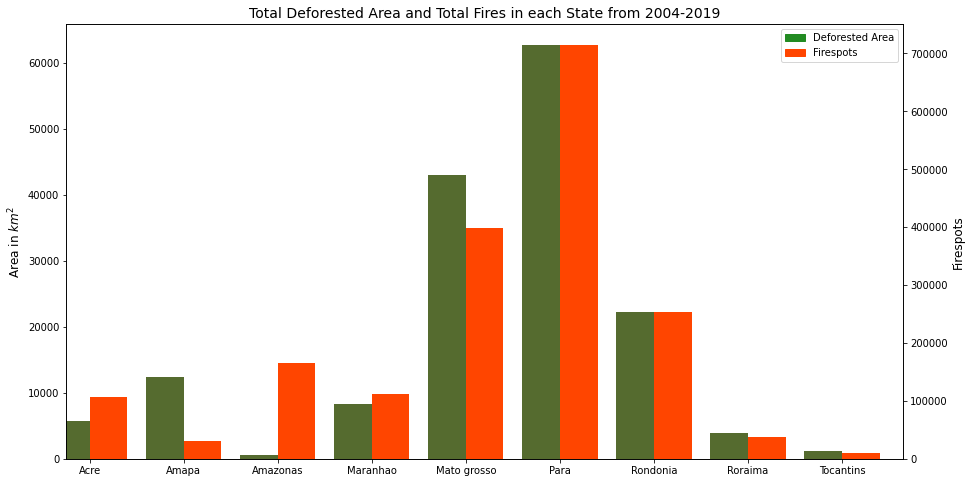

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
# Remove fire data prior to 2004 to match with deforestation data
fires_df_filtered = fires_df[fires_df['year'] >= 2004]
state_fires_df = pd.pivot_table(fires_df_filtered, values='firespots',index=['state'], 
                                aggfunc=np.sum, fill_value=0)
state_fires_df['deforestation'] = bar_def
# Plot data on a single X-axis
ax2 = ax.twinx()
state_fires_df.deforestation.plot(kind='bar', color='darkolivegreen', ax=ax, width=0.4, rot=0, position=1)
state_fires_df.firespots.plot(kind='bar', color='orangered', ax=ax2, width=0.4, rot=0, position=0)
ax.set_title('Total Deforested Area and Total Fires in each State from 2004-2019', fontsize=14)
ax.set_ylabel('Area in $km^2$', fontsize=12)
ax.set_xlabel('')
ax2.set_ylabel('Firespots', fontsize=12)
# Make a legend
bar_colors = {'Deforested Area': 'forestgreen', 'Firespots': 'orangered'}
bar_labels = ['Deforested Area', 'Firespots']
bar_handles = [plt.Rectangle((0,0),1,1,color=bar_colors[label]) for label in bar_labels]
ax.legend(bar_handles, bar_labels)
plt.show()

From the bar chart above we can see that more fires correlate to more deforestation in a state. Amapa and Amazonas however, do not appear to not follow this pattern. A linear regression could help us check for a potential correlation as well. 

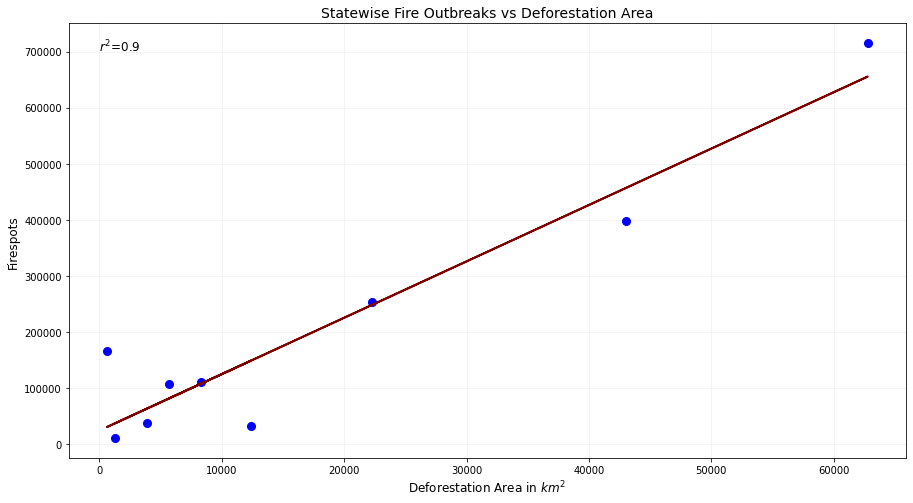

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
slope, intercept, r_value, p_value, std_err = stats.linregress(state_fires_df.deforestation, state_fires_df.firespots)
ax.plot(state_fires_df.deforestation, state_fires_df.firespots, 'o', color='blue', markersize=8)
ax.plot(state_fires_df.deforestation, intercept + slope*state_fires_df.deforestation, linewidth=2, color='maroon')
ax.set_xlabel('Deforestation Area in $km^2$', fontsize=12)
ax.set_ylabel('Firespots', fontsize=12)
ax.set_title('Statewise Fire Outbreaks vs Deforestation Area', fontsize=14)
ax.grid(axis='both', color='0.95')
ax.text(1, 700000, '$r^2$='+str(round(r_value**2, 2)), fontsize='large')
plt.show()

The high value of the coefficient of determination (r-squared) shows that there is a strong correlation between the number of fire outbreaks in a state, and the area of deforestation. 

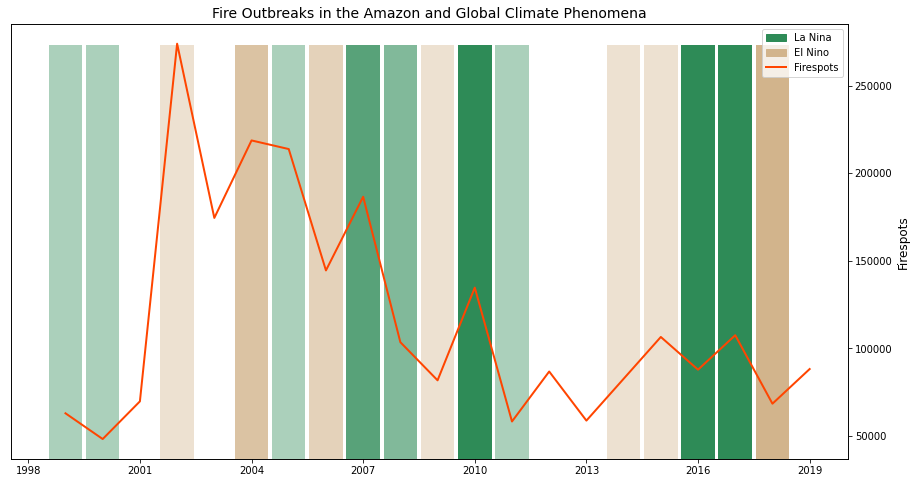

In [ ]:
fig, ax = plt.subplots(figsize=(15,8),sharey=True)
# Merge climate and fire data by year
fires_climate_df = pd.merge(left=total_fires_piv, right=climate_df, how='left', left_on='year', right_on='start year')
# Plot El Nino and La Nina bars
ax.bar(x=climate_df['start year'], height=1, width=0.9, color=climate_df['phenomenon'].replace(colors))
for bar, alpha in zip(ax.containers[0], deforest_climate_df['severity_alpha']):
    bar.set_alpha(alpha)
ax.get_yaxis().set_ticks([])
# Plot firespots line 
ax2 = ax.twinx()
total_fires_piv.plot(linewidth=2,
                     color='orangered', legend=False, ax=ax2)
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_ylabel('Firespots', fontsize=12)
ax2.set_title('Fire Outbreaks in the Amazon and Global Climate Phenomena', fontsize=14)
# Make a legend
legend_labels = ['La Nina', 'El Nino', 'Firespots']
handles = [plt.Rectangle((0,0),1,1,color=colors[label]) for label in labels]
line = plt.Line2D([0], [0], color='orangered', linewidth=2, label='Firespots')
handles.append(line)
ax.legend(handles, legend_labels)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

Fires increased in years when El Nino was active, as seen above in the years 2002, 2004, 2014 and 2015. But, La Nina also was active during fire peaks, such as in the years 2005, 2007, 2010 and 2017. Perhaps it's not solely climate phenomena that are driving the frequency of fires. Fires could be caused by human activities. 

### Conclusion
In conclusion, we can say that Amazon rainforest degradation has been increasing. Factors such as human activity, fire outbreaks, and perhaps El Nino are driving the deforestation, causing great loss to a precious ecosystem.  